### Healthcare Dataset Challenge: 

The task is to analyze the clinical and financial data of patients hospitalized for a certain condition. It is attached with this email. Some variable names and patient_id's have been anonymized in this dataset. You are required to join the data given in different tables, and find insights about the drivers of cost of care. Please see attached documents for datasets.

## Load data and the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as DT
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Load the data
bill_amt = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demographics = pd.read_csv('demographics.csv')

## Preprocessing

In [3]:
bill_amt.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [4]:
bill_amt.shape

(13600, 2)

In [5]:
bill_id.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [6]:
bill_id.shape

(13600, 3)

In [7]:
clinical_data.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [8]:
#Renaming column to be the same as the other columns in the other datasets so that merging can be done.
clinical_data = clinical_data.rename(columns = {'id': 'patient_id'}, inplace = False)

In [9]:
clinical_data.head(20)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0
5,59e07adc2dbc5f70131f57d003610d74,2011-01-07,2011-01-17,0,NaN,No,0,NaN,0,0,...,1,0,1,1,1,15.8,31.0,75.0,78.8,169.0
6,f5c4d97ebf32d49967fbf4f6c5fd52ec,2011-01-06,2011-01-17,0,0.0,0,0,0.0,0,1,...,0,1,0,1,0,12.1,23.0,83.0,81.8,164.0
7,1e788744568c21b390c5aa8c5dd61335,2011-01-07,2011-01-17,0,0.0,0,0,0.0,0,1,...,1,1,0,0,0,16.4,26.8,126.0,73.5,173.0
8,457402b26562d41f4e40906d3d17d5d1,2011-01-12,2011-01-18,0,0.0,No,0,0.0,0,0,...,1,1,1,0,0,12.5,32.9,87.0,98.4,166.0
9,79f52395dab0e6d3a03c48f765cb6562,2011-01-02,2011-01-18,0,0.0,0,0,0.0,0,1,...,1,1,0,1,0,12.1,23.6,109.0,92.8,176.0


In [10]:
clinical_data.shape

(3400, 26)

In [11]:
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [12]:
demographics.shape

(3000, 5)

### Merge data based on bill id and amount with patient id

In [13]:
billing = pd.merge(bill_amt, bill_id, on='bill_id')

In [14]:
billing.head()

,bill_id,amount,patient_id,date_of_admission
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22
1,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28
2,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16
3,3818426276,755.965425,afdfe7216d84e13708a19cbca288379a,2013-01-22
4,9833541918,897.347816,b9a0c119dc07e07f88281964f3a4869f,2011-04-22


In [15]:
billing.shape

(13600, 4)

### Merge data based on patent id for clinical and demographics data

In [16]:
data_1 = pd.merge(billing, demographics, on='patient_id')

In [17]:
data_1.head(20)

,bill_id,amount,patient_id,date_of_admission,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28
5,5243221793,8247.773511,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28
6,3982212482,818.519382,796de06efdad342d3f3a379dff0bd63c,2011-05-26,Female,chinese,Singapore citizen,1973-05-28
7,7295330948,624.157007,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28
8,9056914069,1070.947397,796de06efdad342d3f3a379dff0bd63c,2011-05-26,Female,chinese,Singapore citizen,1973-05-28
9,5852145580,621.841294,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28


In [18]:
data_1.shape

(13600, 8)

### Merge data based on patient id for clinical data

In [19]:
final_data = pd.merge(data_1, clinical_data, on='patient_id') #entire data is merged into one table

In [20]:
final_data.head()

,bill_id,amount,patient_id,date_of_admission_x,gender,race,resident_status,date_of_birth,date_of_admission_y,date_of_discharge,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28,2011-05-26,2011-06-10,...,1,0,0,1,0,15.4,28.8,68.0,74.5,162.0


In [21]:
final_data.shape

(16976, 33)

### Dealing with missing data

In [22]:
final_data.isnull().sum()

bill_id                   0
amount                    0
patient_id                0
date_of_admission_x       0
gender                    0
race                      0
resident_status           0
date_of_birth             0
date_of_admission_y       0
date_of_discharge         0
medical_history_1         0
medical_history_2      1156
medical_history_3         0
medical_history_4         0
medical_history_5      1528
medical_history_6         0
medical_history_7         0
preop_medication_1        0
preop_medication_2        0
preop_medication_3        0
preop_medication_4        0
preop_medication_5        0
preop_medication_6        0
symptom_1                 0
symptom_2                 0
symptom_3                 0
symptom_4                 0
symptom_5                 0
lab_result_1              0
lab_result_2              0
lab_result_3              0
weight                    0
height                    0
dtype: int64

In [23]:
#Filling missing values with 0.
final_data['medical_history_2'] = final_data['medical_history_2'].fillna(0)
final_data['medical_history_5'] = final_data['medical_history_5'].fillna(0)
final_data.isnull().sum()

bill_id                0
amount                 0
patient_id             0
date_of_admission_x    0
gender                 0
race                   0
resident_status        0
date_of_birth          0
date_of_admission_y    0
date_of_discharge      0
medical_history_1      0
medical_history_2      0
medical_history_3      0
medical_history_4      0
medical_history_5      0
medical_history_6      0
medical_history_7      0
preop_medication_1     0
preop_medication_2     0
preop_medication_3     0
preop_medication_4     0
preop_medication_5     0
preop_medication_6     0
symptom_1              0
symptom_2              0
symptom_3              0
symptom_4              0
symptom_5              0
lab_result_1           0
lab_result_2           0
lab_result_3           0
weight                 0
height                 0
dtype: int64

In [24]:
final_data.shape

(16976, 33)

In [25]:
final_data = final_data.drop_duplicates() #to drop any duplicate rows (if any)
final_data.head()

,bill_id,amount,patient_id,date_of_admission_x,gender,race,resident_status,date_of_birth,date_of_admission_y,date_of_discharge,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,Female,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,Female,chinese,Singapore citizen,1973-05-28,2011-05-26,2011-06-10,...,1,0,0,1,0,15.4,28.8,68.0,74.5,162.0


In [26]:
final_data.shape

(16976, 33)

In [27]:
break

SyntaxError: 'break' outside loop (<ipython-input-27-6aaf1f276005>, line 4)

# Exploratory Data Analysis

## Gender

In [28]:
final_data['gender'].value_counts()

Female    7968
Male      7352
m         1064
f          592
Name: gender, dtype: int64

In [29]:
final_data["gender"]= final_data["gender"].str.replace("Male", "m")
final_data["gender"]= final_data["gender"].str.replace("Female", "f")

In [30]:
final_data['gender'].value_counts()

f    8560
m    8416
Name: gender, dtype: int64

In [31]:
billing_cost_by_gender = final_data.groupby('gender')['amount'].sum().reset_index()
billing_cost_by_gender

,gender,amount
0,f,4.549343e+07
1,m,4.715502e+07


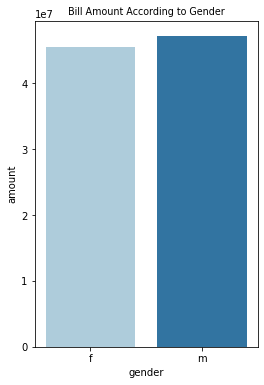

In [32]:
plt.figure(figsize=(4,6))
sns.barplot(data=billing_cost_by_gender, x="gender", y="amount", palette=("Paired"))
sns.set_context('paper')
plt.title('Bill Amount According to Gender');

## Race

In [33]:
final_data['race'].value_counts()

Chinese    8952
Malay      3484
chinese    1840
Indian     1224
Others      908
India       568
Name: race, dtype: int64

In [34]:
#Rename duplicate races such as Chinese and chinese so that they can be merged into one category
final_data["race"]= final_data["race"].str.replace("chinese", "Chinese")
final_data["race"]= final_data["race"].str.replace("India", "Indian")
final_data["race"]= final_data["race"].str.replace("Indiann", "Indian")

In [35]:
final_data['race'].value_counts() #Checking if the appropriate changes have been made

Chinese    10792
Malay       3484
Indian      1792
Others       908
Name: race, dtype: int64

In [36]:
#Grouping the bill amount by race
billing_cost_by_race = final_data.groupby('race')['amount'].sum().reset_index()
billing_cost_by_race

,race,amount
0,Chinese,5.159101e+07
1,Indian,1.048860e+07
2,Malay,2.575888e+07
3,Others,4.809952e+06


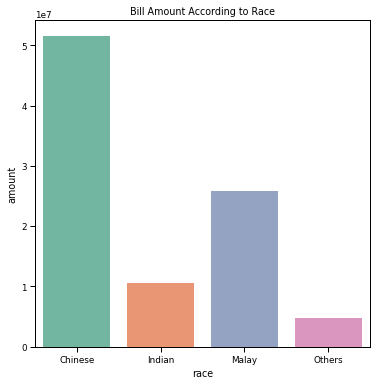

In [37]:
#plotting the data
plt.figure(figsize=(6,6))
sns.barplot(data=billing_cost_by_race, x="race", y="amount", palette=("Set2"))
plt.title('Bill Amount According to Race');

In [38]:
race_count = final_data.groupby('race')['amount'].describe()[['count']].reset_index()
race_count

,race,count
0,Chinese,10792.0
1,Indian,1792.0
2,Malay,3484.0
3,Others,908.0


In [39]:
race_df = pd.merge(race_count, billing_cost_by_race, on='race')
race_df['average_bill_amount_per_person'] = race_df['amount']/race_df['count']
race_df

,race,count,amount,average_bill_amount_per_person
0,Chinese,10792.0,5.159101e+07,4780.486548
1,Indian,1792.0,1.048860e+07,5853.015398
2,Malay,3484.0,2.575888e+07,7393.480014
3,Others,908.0,4.809952e+06,5297.304288


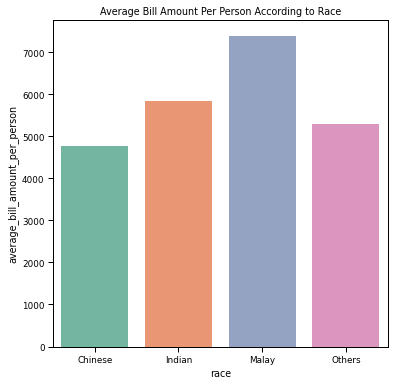

In [40]:
#plotting the data
plt.figure(figsize=(6,6))
sns.barplot(data=race_df, x="race", y="average_bill_amount_per_person", palette=("Set2"))
plt.title('Average Bill Amount Per Person According to Race');

# Correlation Matrix

In [41]:
#Adding another column, age, based on today's date and date of birth.

final_data['date_of_birth'] = pd.to_datetime(final_data['date_of_birth'], format='%Y-%m-%d')
final_data['date_of_admission_y'] = pd.to_datetime(final_data['date_of_admission_y'], format='%Y-%m-%d')
final_data['date_of_birth'] = final_data['date_of_birth'].where(final_data['date_of_birth'] < final_data['date_of_admission_y'], final_data['date_of_birth'] -  np.timedelta64(100, 'Y'))
final_data['age'] = (final_data['date_of_admission_y'] - final_data['date_of_birth']).astype('<m8[Y]')
final_data

#Reference: https://www.codegrepper.com/code-examples/python/convert+birth+date+column+to+age+pandas

,bill_id,amount,patient_id,date_of_admission_x,gender,race,resident_status,date_of_birth,date_of_admission_y,date_of_discharge,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,age
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,f,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,17.6,31.8,98.0,65.1,166.0,45.0
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,f,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,17.6,31.8,98.0,65.1,166.0,45.0
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,f,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,17.6,31.8,98.0,65.1,166.0,45.0
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,f,Malay,Singaporean,1967-05-15,2012-10-22,2012-11-03,...,1,1,1,1,17.6,31.8,98.0,65.1,166.0,45.0
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,f,Chinese,Singapore citizen,1973-05-28,2011-05-26,2011-06-10,...,0,0,1,0,15.4,28.8,68.0,74.5,162.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16971,1123494323,663.585265,7373cb1310011241d432d36b25c5bca6,2011-09-17,m,Chinese,Singaporean,1973-09-14,2011-09-17,2011-09-27,...,1,1,1,1,15.5,29.5,113.0,75.5,182.0,38.0
16972,8843072066,1324.691516,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,m,Malay,Singaporean,1972-01-04,2013-09-16,2013-09-30,...,0,1,0,1,12.1,29.4,115.0,77.8,175.0,41.0
16973,2727258154,18386.672482,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,m,Malay,Singaporean,1972-01-04,2013-09-16,2013-09-30,...,0,1,0,1,12.1,29.4,115.0,77.8,175.0,41.0
16974,38401965,5280.005320,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,m,Malay,Singaporean,1972-01-04,2013-09-16,2013-09-30,...,0,1,0,1,12.1,29.4,115.0,77.8,175.0,41.0


### Dropping unnecessary columns

In [42]:
#drop unnecessary columns
final_data = final_data.drop(['date_of_admission_x', 'date_of_admission_y','date_of_discharge',
                             'race', 'gender','resident_status','bill_id','date_of_birth','patient_id'], axis=1) 

In [43]:
final_data.shape

(16976, 25)

### Normalize data

In [44]:
#Normalize Continuous Data
final_data['lab_result_1']=(final_data['lab_result_1']- final_data['lab_result_1'].min())/(final_data['lab_result_1'].max()-final_data['lab_result_1'].min())
final_data['lab_result_2']=(final_data['lab_result_2']- final_data['lab_result_2'].min())/(final_data['lab_result_2'].max()-final_data['lab_result_2'].min())
final_data['lab_result_3']=(final_data['lab_result_3']- final_data['lab_result_3'].min())/(final_data['lab_result_3'].max()-final_data['lab_result_3'].min())
final_data['weight']=(final_data['weight']- final_data['weight'].min())/(final_data['weight'].max()-final_data['weight'].min())
final_data['height']=(final_data['height']- final_data['height'].min())/(final_data['height'].max()-final_data['height'].min())
final_data['age']=(final_data['age']- final_data['age'].min())/(final_data['age'].max()-final_data['age'].min())
final_data['amount']=(final_data['amount']- final_data['amount'].min())/(final_data['amount'].max()-final_data['amount'].min())

In [45]:
final_data.head()

,amount,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,age
0,0.018016,0,0.0,0,0,0.0,0,1,0,0,...,1,1,1,1,0.758929,0.785714,0.469388,0.234247,0.428571,0.375
1,0.340514,0,0.0,0,0,0.0,0,1,0,0,...,1,1,1,1,0.758929,0.785714,0.469388,0.234247,0.428571,0.375
2,0.022912,0,0.0,0,0,0.0,0,1,0,0,...,1,1,1,1,0.758929,0.785714,0.469388,0.234247,0.428571,0.375
3,0.014253,0,0.0,0,0,0.0,0,1,0,0,...,1,1,1,1,0.758929,0.785714,0.469388,0.234247,0.428571,0.375
4,0.011649,0,0.0,1,0,0.0,0,0,1,0,...,0,0,1,0,0.562500,0.590909,0.163265,0.363014,0.314286,0.250


In [46]:
final_data.describe()

,amount,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,age
count,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,...,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000
mean,0.065771,0.170358,0.290057,0.051131,0.059614,0.258483,0.251649,0.507069,0.594486,0.819510,...,0.664467,0.541942,0.731385,0.526155,0.479132,0.501174,0.484256,0.420153,0.400222,0.485995
std,0.094022,0.375958,0.453802,0.220271,0.236776,0.437813,0.433974,0.499965,0.491006,0.384606,...,0.472190,0.498252,0.443252,0.499330,0.155261,0.161096,0.155608,0.149563,0.197674,0.230555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.366071,0.389610,0.367347,0.317808,0.257143,0.281250
50%,0.017564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.482143,0.500000,0.489796,0.421918,0.400000,0.453125
75%,0.088389,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.598214,0.616883,0.591837,0.523288,0.542857,0.687500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
#from the earlier cell, it has been noticed that the attribute, 'medical_history_3' is missing. Upon further inspection, 
# it can be seen that the column contributes numerical and non-numerical input. This will be fixed in the next cell.
final_data['medical_history_3'].value_counts()

0      10868
No      3804
1       1720
Yes      584
Name: medical_history_3, dtype: int64

In [48]:
final_data["medical_history_3"]= final_data["medical_history_3"].str.replace("No", "0", case = True)
final_data["medical_history_3"]= final_data["medical_history_3"].str.replace("Yes", "1", case = True)
final_data['medical_history_3'].value_counts()

0    14672
1     2304
Name: medical_history_3, dtype: int64

In [49]:
#moving the dependent variable to the last column to plot the correlation matrix
final_data = final_data[[col for col in final_data.columns if col != 'amount' ] + ['amount']]

In [50]:
final_data.describe()

,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,...,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,age,amount
count,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,...,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000
mean,0.170358,0.290057,0.051131,0.059614,0.258483,0.251649,0.507069,0.594486,0.819510,0.526390,...,0.541942,0.731385,0.526155,0.479132,0.501174,0.484256,0.420153,0.400222,0.485995,0.065771
std,0.375958,0.453802,0.220271,0.236776,0.437813,0.433974,0.499965,0.491006,0.384606,0.499318,...,0.498252,0.443252,0.499330,0.155261,0.161096,0.155608,0.149563,0.197674,0.230555,0.094022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.366071,0.389610,0.367347,0.317808,0.257143,0.281250,0.010668
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.482143,0.500000,0.489796,0.421918,0.400000,0.453125,0.017564
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.598214,0.616883,0.591837,0.523288,0.542857,0.687500,0.088389
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


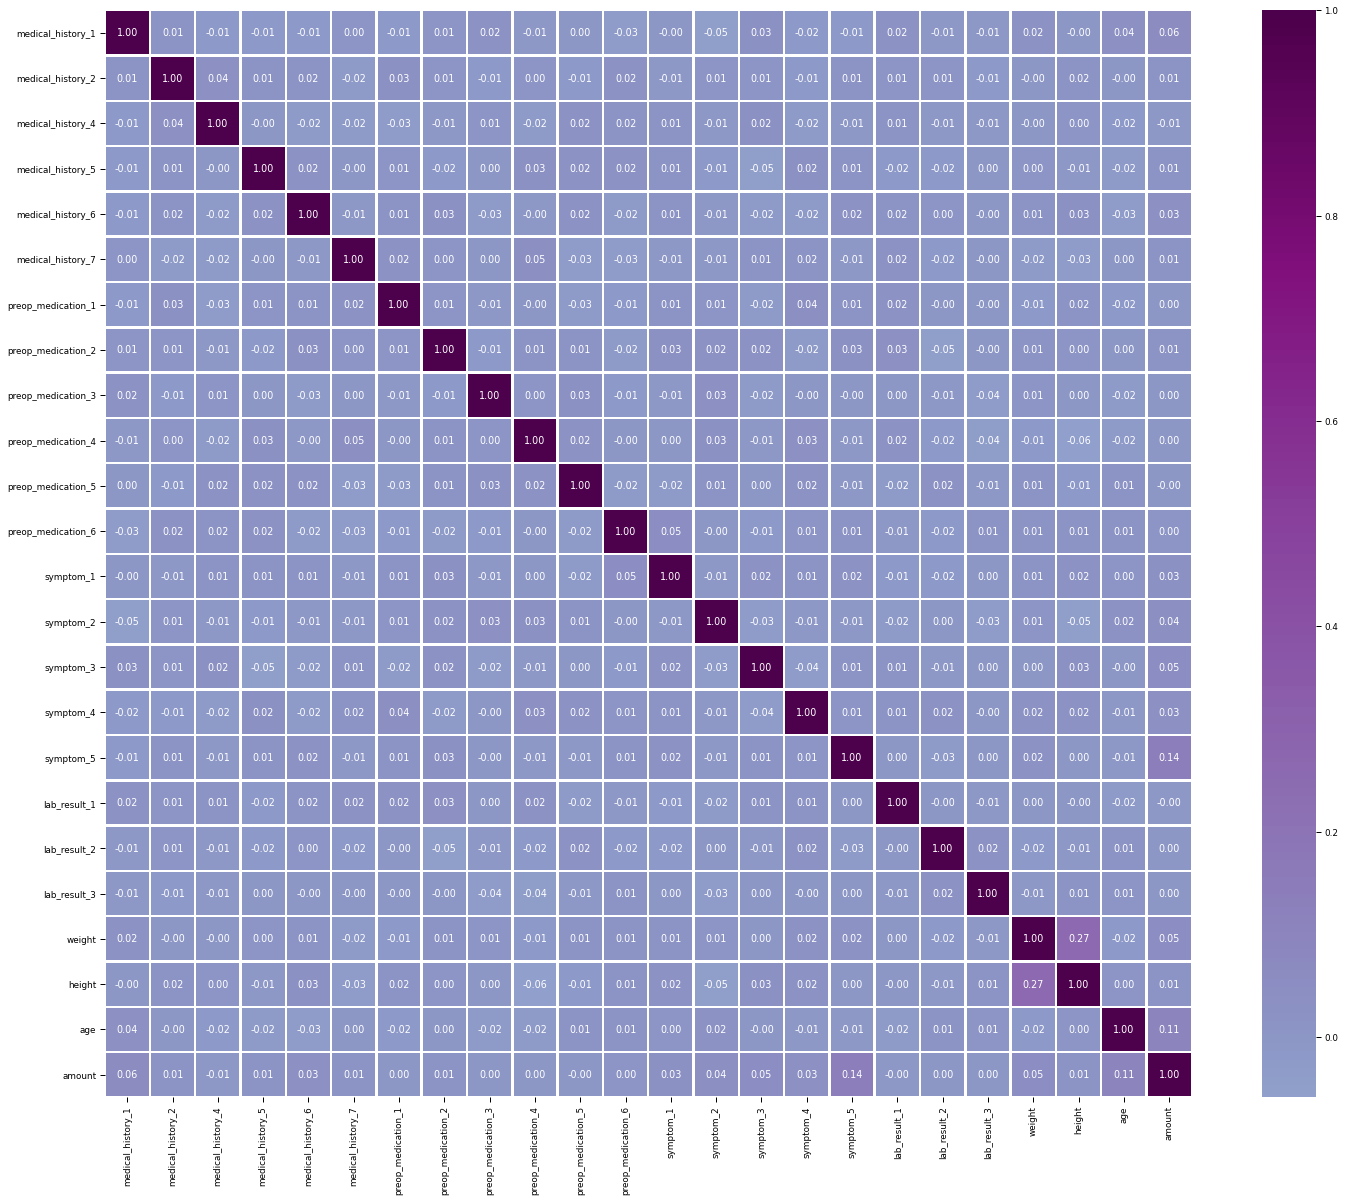

In [51]:
import seaborn as sns

def correlation_heatmap(final_data):
    correlations = final_data.corr()

    fig, ax = plt.subplots(figsize=(25,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=1.5, annot=True, cmap = "BuPu")
    plt.show()
    
correlation_heatmap(final_data)

In [52]:
#Correlation with output variable
correlations = final_data.corr()
cor_target = abs(correlations["amount"])

#Selecting highly correlated features
#Check which independent variables are correlated with the dependent variable with at least 0.05 
#(since we are trying to observe more number of features).
relevant_features = cor_target[cor_target>0.01]
relevant_features = pd.DataFrame(relevant_features)
relevant_features

#Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

,amount
medical_history_1,0.061369
medical_history_6,0.033451
medical_history_7,0.011287
symptom_1,0.031128
symptom_2,0.041542
symptom_3,0.050415
symptom_4,0.034396
symptom_5,0.136589
weight,0.054727
age,0.107086


##### Check for multi-colinearity

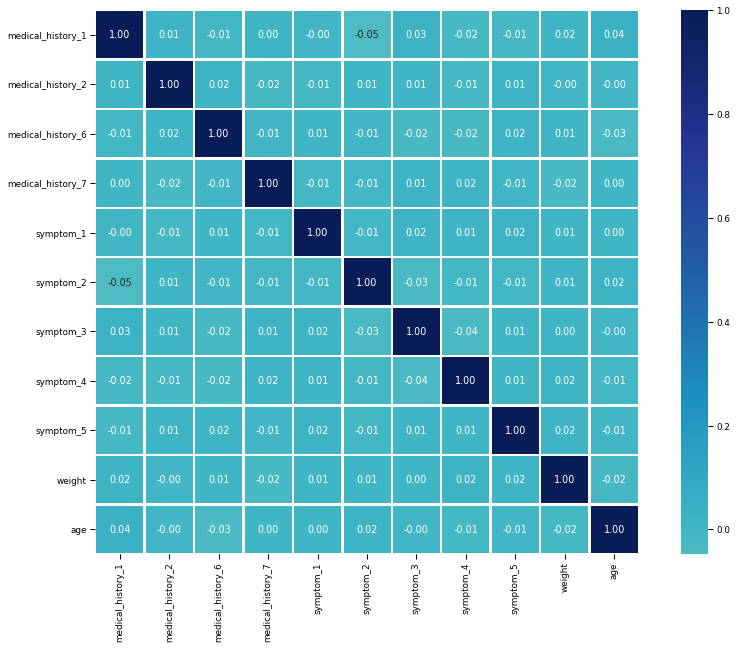

In [53]:
corr_required_cols = ['medical_history_1', 'medical_history_2', 'medical_history_6','medical_history_7', 'symptom_1', 
                      'symptom_2', 'symptom_3','symptom_4','symptom_5', 'weight','age']
Corr_Var_data = final_data[corr_required_cols]

#Corr_Var_data = relevant_features.drop('amount', axis=0)

def correlation_heatmap(Corr_Var_data):
    correlations = Corr_Var_data.corr()

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=1.5, annot=True, cmap = "YlGnBu")
    plt.show()
    
correlation_heatmap(Corr_Var_data)

Comment: Out of all the attributes that correlate more with the dependent variable, bill amount, there seems to be little multi-collinearity between these selected attributes. Hence, we will use these 11 attributes out of the 25 attributes for further analysis.

In [ ]:
#break

# Modeling

In [54]:
X = final_data[corr_required_cols]
y = final_data['amount']

#Split X and y into training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

### Random Search to narrow down the range for each hyperparameter

In [55]:
#reference:https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

rfr_model = RandomForestRegressor(random_state  = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

param_grid = { 
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'max_depth' : max_depth,
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False] # Method of selecting samples for training each tree
}

pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [56]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 85.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [57]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [58]:
from sklearn import metrics

#Base model
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_base))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_base))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_base)))

Mean Absolute Error: 0.08617202585850037
Mean Squared Error: 0.01381943808083316
Root Mean Squared Error: 0.11755610609761263


In [59]:
#Random Search model
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07294157128928956
Mean Squared Error: 0.009658106645563143
Root Mean Squared Error: 0.09827566659943418


### Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [1000, 2000, 4000, 6000],
    'max_features': ['log2'], # Number of features to consider at every split
    'max_depth' : [5, 10, 20, 40, 60],
    'min_samples_split': [5, 10, 20, 40], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10], # Minimum number of samples required at each leaf node
    'bootstrap': [True] # Method of selecting samples for training each tree
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
rfr_gs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 69.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 149.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 240.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [61]:
rfr_gs.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 40,
 'n_estimators': 1000}

In [62]:
#Grid Search model
best_grid = rfr_gs.best_estimator_
y_pred = best_grid.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06992730148427526
Mean Squared Error: 0.00899464229063383
Root Mean Squared Error: 0.0948400879936002


In [ ]:
break

# K-means Clustering

Objective: To group similar data points together and discover underlying patterns

In [ ]:
#pip install scikit-learn==0.22.2

In [ ]:
plt.scatter(final_data['age'], final_data['amount'], c='black')
plt.xlabel('Age')
plt.ylabel('Bill Amount')
plt.show

In [ ]:
import sklearn
from sklearn.cluster import KMeans

In [ ]:
K=3
Centroids = (final_data.sample(n=K))
plt.scatter(final_data['age'], final_data['amount'], c='black')
plt.scatter(Centroids['age'], Centroids['amount'], c='red')
plt.xlabel('Age')
plt.ylabel('Bill Amount')
plt.show

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=final_data
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["age"]-row_d["age"])**2
            d2=(row_c["amount"]-row_d["amount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        final_data[i]=ED
        i=i+1

    C=[]
    for index,row in final_data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    final_data["Cluster"]=C
    Centroids_new = final_data.groupby(["Cluster"]).mean()[["amount","age"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['amount'] - Centroids['amount']).sum() + (Centroids_new['age'] - Centroids['age']).sum()
        print(diff.sum())
    Centroids = final_data.groupby(["Cluster"]).mean()[["amount","age"]]

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=final_data[final_data["Cluster"]==k+1]
    plt.scatter(data["age"],data["amount"],c=color[k])
plt.scatter(Centroids["age"],Centroids["amount"],c='red')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

# Appendix

In [ ]:
## Correlation Matrix for just continuous data
continuous_data = ['lab_result_1', 'lab_result_2', 'lab_result_3', 'weight','height','age','amount']
continuous_df = final_data[continuous_data]
continuous_df

In [ ]:
import seaborn as sns

def correlation_heatmap(continuous_df):
    correlations = continuous_df.corr()

    fig, ax = plt.subplots(figsize=(25,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=1.5, annot=True, cmap = "YlGnBu")
    plt.show()
    
correlation_heatmap(continuous_df)

In [ ]:
#Correlation with output variable
correlations = continuous_df.corr()
cor_target = abs(correlations["amount"])

#Selecting highly correlated features
#Check which independent variables are correlated with the dependent variable with at least 0.01 
#(since we are trying to observe more number of features).
relevant_features = cor_target[cor_target>0.01]
relevant_features

#Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b